<a href="https://colab.research.google.com/github/KingaKlejne/jdszr3-databusters/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Basic information about dataset:

Original datasets are in the following files:

- train.pickle

- valid.pickle

- test.pickle

Resulted preprocessed nine files are as follows:

- data0.pickle - Shuffling

- data1.pickle - Shuffling, /255.0 Normalization

- data2.pickle - Shuffling, /255.0 + Mean Normalization

- data3.pickle - Shuffling, /255.0 + Mean + STD Normalization

- data4.pickle - Grayscale, Shuffling

- data5.pickle - Grayscale, Shuffling, Local Histogram Equalization

- data6.pickle - Grayscale, Shuffling, Local Histogram Equalization, /255.0 Normalization

- data7.pickle - Grayscale, Shuffling, Local Histogram Equalization, /255.0 + Mean Normalization

- data8.pickle - Grayscale, Shuffling, Local Histogram Equalization, /255.0 + Mean + STD Normalization

Datasets data0 - data3 have RGB images and datasets data4 - data8 have Gray images.


Shapes of data0 - data3 are as following (RGB):

- xtrain: (86989, 3, 32, 32) 
- ytrain: (86989,)

- xvalidation: (4410, 3, 32, 32) 
- yvalidation: (4410,)

- xtest: (12630, 3, 32, 32) 
- ytest: (12630,)


Shapes of data4 - data8 are as following (Gray):

- xtrain: (86989, 1, 32, 32) 
- ytrain: (86989,)

- xvalidation: (4410, 1, 32, 32) 
- yvalidation: (4410,)

- xtest: (12630, 1, 32, 32) 
- ytest: (12630,)


mean image and standard deviation were calculated from train dataset and applied to validation and testing datasets for appropriate datasets. When using user's image for classification, it has to be preprocessed firstly in the same way and in the same order according to the chosen dataset among nine.

**Test online**

Experiment online with custom Traffic Sign here: https://valentynsichkar.name/traffic_signs.html

**Acknowledgements**

Initial data is German Traffic Sign Recognition Benchmarks (GTSRB).

**Classes:** 43

**Amount:** 86989 examples. 

# 1. Accesing Google Drive

In [1]:
#Accessing files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Imports

In [2]:
#Imports
import os
import pandas as pd
import torch
from albumentations import Compose, ShiftScaleRotate, Resize, Blur, HorizontalFlip, Normalize, ElasticTransform
import numpy as np
from albumentations.pytorch import ToTensor
import matplotlib.pyplot as plt
import pickle

# 3. Importing files

In [3]:
#check if it works
df = pd.read_pickle('/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data2.pickle')

In [4]:
root_dir = '/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/'

for dirname, _, filenames in os.walk(root_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data0.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data1.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data2.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data3.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data4.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data5.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data6.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data7.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data8.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/test.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/std_gray.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/mean_image_gray.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/labels.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/std_rgb.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNIN

In [5]:
train = pickle.load(open(root_dir + 'train.pickle', 'rb'))
valid = pickle.load(open(root_dir + 'valid.pickle', 'rb'))
test = pickle.load(open(root_dir + 'test.pickle', 'rb'))
labels = pickle.load(open(root_dir + 'labels.pickle', 'rb'))
std_gray = pickle.load(open(root_dir + 'std_gray.pickle', 'rb'))
std_rgb = pickle.load(open(root_dir + 'std_rgb.pickle', 'rb'))
mean_gray = pickle.load(open(root_dir + 'mean_image_gray.pickle', 'rb'))
mean_rgb = pickle.load(open(root_dir + 'mean_image_rgb.pickle', 'rb'))
data_rgb = pickle.load(open(root_dir + 'data3.pickle', 'rb'))
data_gray = pickle.load(open(root_dir + 'data8.pickle', 'rb'))

# 4. EDA

In [7]:
label_names = pd.read_csv(root_dir + 'label_names.csv')
label_names.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [8]:
print(f'Number of classes: {len(label_names)}')

Number of classes: 43


In [9]:
unique = label_names['SignName'].unique()
print(f'Names of classes: {unique}')

Names of classes: ['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn right ahead'
 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric tons']


# 5. Data split

In [6]:
X_train = train['features']
y_train = train['labels']
X_valid = valid['features']
y_valid = valid['labels']
X_test = test['features']
y_test = test['labels']

X_train_gray = data_gray['x_train']
y_train_gray = data_gray['y_train']
X_valid_gray = data_gray['x_validation']
y_valid_gray = data_gray['y_validation']
X_test_gray = data_gray['x_test']
y_test_gray = data_gray['y_test']

X_train_rgb = data_rgb['x_train']
y_train_rgb = data_rgb['y_train']
X_valid_rgb = data_rgb['x_validation']
y_valid_rgb = data_rgb['y_validation']
X_test_rgb = data_rgb['x_test']
y_test_rgb = data_rgb['y_test']

#changing shape, as axes are at different position
X_train_gray = X_train_gray.swapaxes(1,3)
X_valid_gray = X_valid_gray.swapaxes(1,3)
X_test_gray = X_test_gray.swapaxes(1,3)

X_train_rgb = X_train_rgb.swapaxes(1,3)
X_valid_rgb = X_valid_rgb.swapaxes(1,3)
X_test_rgb = X_test_rgb.swapaxes(1,3)

In [11]:
def shapes(X, y):
    print("X: ", X.shape)
    print("y: ", y.shape)
    

shapes(X_train, y_train)
shapes(X_valid, y_valid)
shapes(X_test, y_test)

X:  (34799, 32, 32, 3)
y:  (34799,)
X:  (4410, 32, 32, 3)
y:  (4410,)
X:  (12630, 32, 32, 3)
y:  (12630,)


In [12]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [29]:
#creating dataframe for labels from test set
df_train = pd.DataFrame(data = train['labels'], columns = ['ClassId'])
#merging tables
df_labels = pd.merge(df_train, label_names, on='ClassId', how='left').reset_index(drop=True)
#grouping data
df_labels = df_labels.groupby(by=['SignName'])
#sum data
df_labels = df_labels.count()

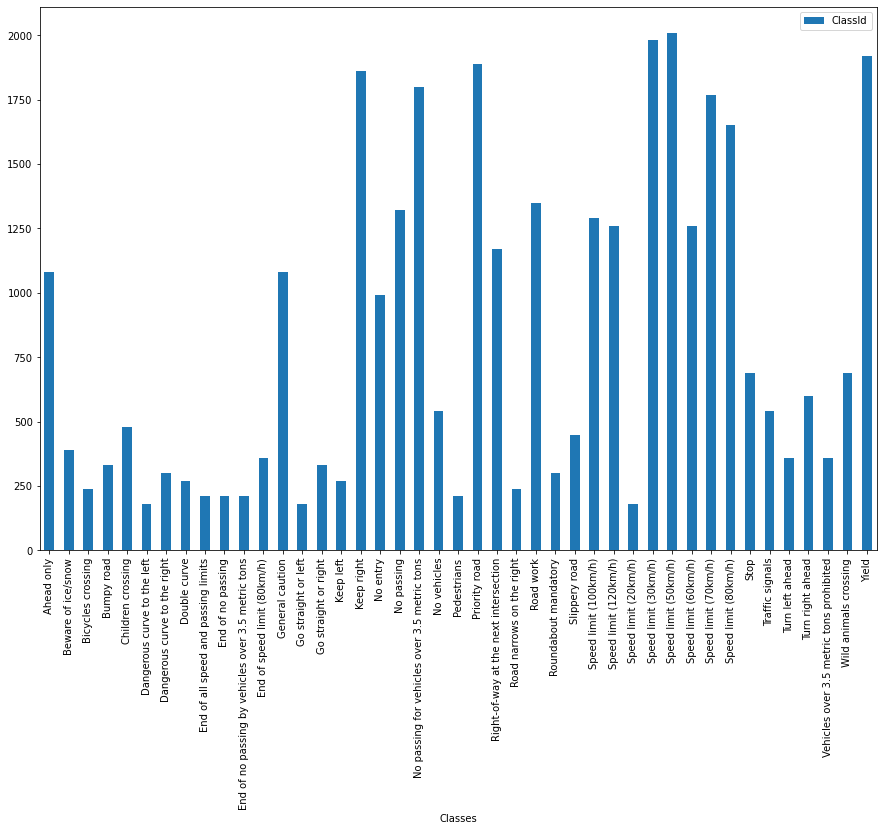

In [30]:
#how many samples of each class plot
df_labels.plot(kind = 'bar', figsize=(15, 10), xlabel = 'Classes')

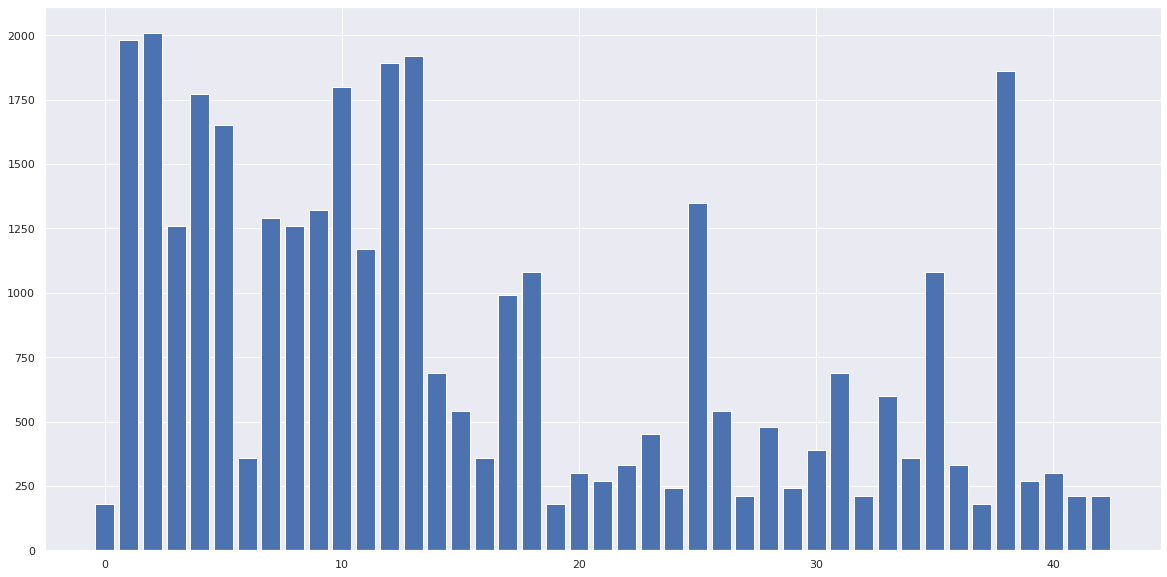

In [ ]:
# how many samples of each class
junik, counts = np.unique(y_train, return_counts=True)
# plotting
fig = plt.figure(figsize = (20,10))
plt.bar(junik,counts)
plt.show()

# 6.Showing pictures

In [37]:
# class and function to show pictures

class TrafficSignsDataset(torch.utils.data.Dataset):

    def __init__(self, images, labels, num_classes, transform=None):
        
        self.images = images
        self.labels = labels
        self.C = num_classes
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label_idx = self.labels[idx]

        label = np.zeros(self.C)
        label[label_idx] = 1
        
        augmented = self.transform(image=img)
        img = augmented['image']
            
        label = torch.tensor(label)
        
        return {'image': img, 'label': label}

def show_pictures(X,y):

  MEANS = np.mean(X_train, axis=(0, 1, 2)) / 255.
  STDS = np.std(X_train, axis=(0, 1, 2)) / 255.

  BATCH_SIZE = 128
  NUM_CLASSES = 43

  transform_train = Compose([
      Normalize(mean=MEANS, std=STDS),
      Blur(blur_limit=3, p=0.1),
      ShiftScaleRotate(rotate_limit=30, p=0.3),
      ElasticTransform(p=0.1),
      ToTensor()
  ])

  transform_test = Compose([
      Normalize(mean=MEANS, std=STDS),
      ToTensor()
  ])

  dataset = TrafficSignsDataset(X, y, NUM_CLASSES, transform=transform_train)

  data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)


  batch = next(iter(data_loader))
  fig, axs = plt.subplots(1, 5, figsize=(15,5))

  # print('shape', batch['image'].shape)
  # print('min', batch['image'].min())
  # print('max', batch['image'].max())
  # print('mean', batch['image'].mean())
  # print('std', batch['image'].std())

  for i in np.arange(5):
      img = np.transpose(batch['image'][i].numpy(), (1,2,0))
      img = img * STDS + MEANS
      sign = label_names[label_names.ClassId == torch.argmax(batch['label'][i]).item()]['SignName'].values[0]
      axs[i].imshow(img)
      axs[i].set_title(sign)

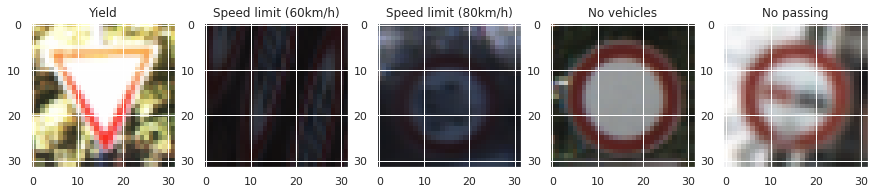

In [ ]:
#plotting train set
show_pictures(X_train, y_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


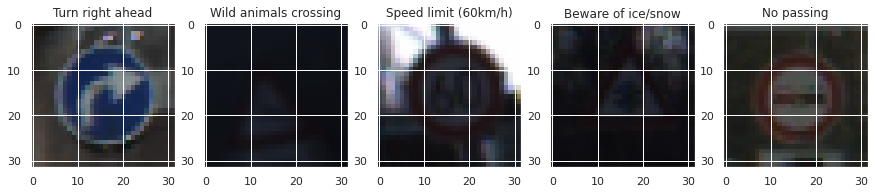

In [ ]:
#plotting test set
show_pictures(X_test, y_test)

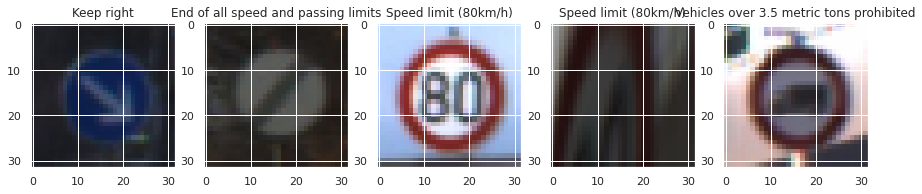

In [ ]:
#plotting validation set
show_pictures(X_valid, y_valid)

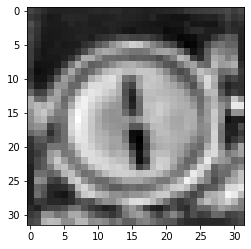

In [139]:
#gray data
plt.imshow(X_train_gray[1000].squeeze())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


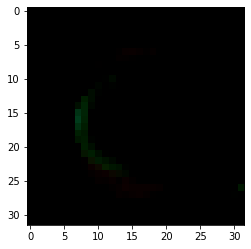

In [140]:
#rgb data
plt.imshow(X_train_rgb[1000].squeeze())

# 7. Normalization

In [7]:
#normalize to range 0-1:
X_train = X_train /255.0
X_test = X_test /255.0
X_valid = X_valid /255.0

X_train_gray = X_train_gray /255.0
X_test_gray = X_test_gray /255.0
X_valid_gray = X_valid_gray /255.0

X_train_rgb = X_train_rgb /255.0
X_test_rgb = X_test_rgb /255.0
X_valid_rgb = X_valid_rgb /255.0


In [70]:
# # one hot encode target values:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# y_valid = to_categorical(y_valid)

# y_train_gray = to_categorical(y_train_gray)
# y_test_gray = to_categorical(y_test_gray)
# y_valid_gray = to_categorical(y_valid_gray)

# y_train_rgb = to_categorical(y_train_rgb)
# y_test_rgb = to_categorical(y_test_rgb)
# y_valid_rgb = to_categorical(y_valid_rgb)

In [8]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train,43)
y_test = np_utils.to_categorical(y_test,43)
y_valid = np_utils.to_categorical(y_valid,43)

y_train_gray = np_utils.to_categorical(y_train_gray,43)
y_test_gray = np_utils.to_categorical(y_test_gray,43)
y_valid_gray = np_utils.to_categorical(y_valid_gray,43)

y_train_rgb = np_utils.to_categorical(y_train_rgb,43)
y_test_rgb = np_utils.to_categorical(y_test_rgb,43)
y_valid_rgb = np_utils.to_categorical(y_valid_rgb,43)

# 8.CNN Model

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.vis_utils import plot_model
from keras.optimizers import RMSprop
import h5py
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                 input_shape=X_test.shape[1:],
                 activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)         

In [ ]:
model.compile(optimizer=RMSprop(lr=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                   batch_size=32,
                   epochs=20,
                   validation_data=(X_valid, y_valid),
                   shuffle=True)

Epoch 1/20
1088/1088 [==============================] - 10s 8ms/step - loss: 3.2226 - accuracy: 0.1584 - val_loss: 1.5203 - val_accuracy: 0.5955
Epoch 2/20
1088/1088 [==============================] - 8s 7ms/step - loss: 1.2977 - accuracy: 0.6158 - val_loss: 0.6355 - val_accuracy: 0.8274
Epoch 3/20
1088/1088 [==============================] - 8s 7ms/step - loss: 0.6255 - accuracy: 0.8099 - val_loss: 0.4531 - val_accuracy: 0.8766
Epoch 4/20
1088/1088 [==============================] - 8s 7ms/step - loss: 0.3514 - accuracy: 0.8940 - val_loss: 0.3176 - val_accuracy: 0.9218
Epoch 5/20
1088/1088 [==============================] - 8s 7ms/step - loss: 0.2278 - accuracy: 0.9311 - val_loss: 0.2446 - val_accuracy: 0.9372
Epoch 6/20
1088/1088 [==============================] - 8s 7ms/step - loss: 0.1625 - accuracy: 0.9509 - val_loss: 0.2037 - val_accuracy: 0.9483
Epoch 7/20
1088/1088 [==============================] - 8s 7ms/step - loss: 0.1285 - accuracy: 0.9639 - val_loss: 0.1958 - val_accuracy

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

395/395 [==============================] - 1s 4ms/step - loss: 0.1616 - accuracy: 0.9677
Test loss: 0.1616436392068863
Test accuracy: 0.967695951461792


In [10]:
def define_model():
  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                  input_shape=X_test.shape[1:],
                  activation='relu'))
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(units=512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))

  model.summary()

  model.compile(optimizer=RMSprop(lr=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

  return model

# 9. Plotting results

In [10]:
def make_accuracy_plot(history):
    """
    The function returns plot of the model's accuracy on the training and validation set.
    """
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Training accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Validation accuracy', marker='o')
    plt.legend()
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

def make_loss_plot(history):
    """
    The function returns the model loss plot on the training and validation set.
    """
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Training loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation loss', marker='o')
    plt.legend()
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

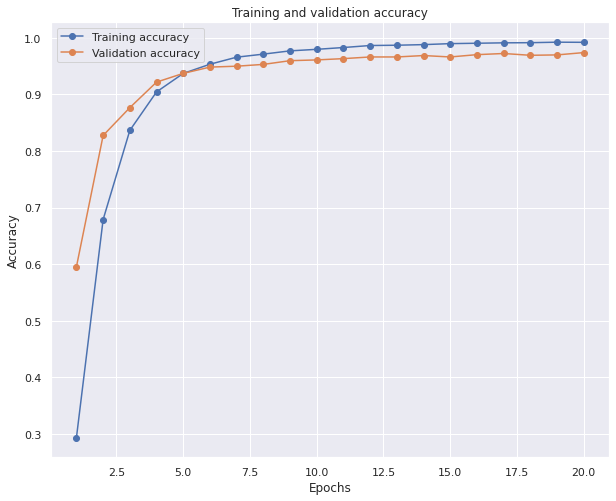

In [ ]:
make_accuracy_plot(history)

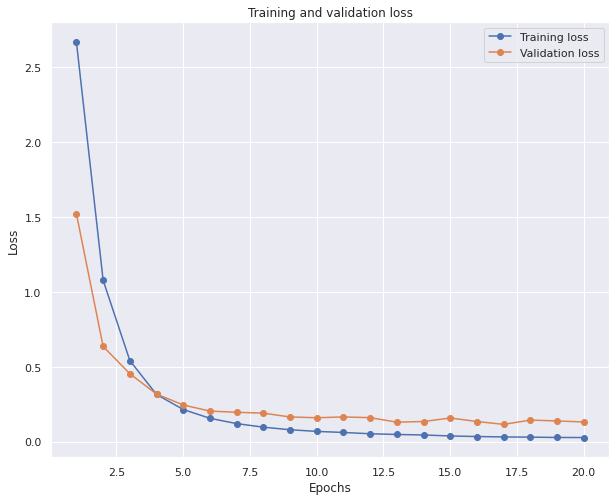

In [ ]:
make_loss_plot(history)

# 10. Confusion matrix

In [ ]:
#Confusion matrix needs both labels & predictions as single-digits, not as one-hot encoded vectors,
#hence added rounded_predictions
rounded_predictions = model.predict_classes(X_test, batch_size=128, verbose=0)
#test_labels are still one-hot encoded, hence convert them too to single-digit ones, as follows:
rounded_labels=np.argmax(y_test, axis=1)
#creating confusion matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
#creating classes names:
label_names_list = label_names['SignName'].values.tolist()

In [ ]:
print(classification_report(rounded_labels, rounded_predictions, target_names=label_names_list))


                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      1.00      1.00        60
                              Speed limit (30km/h)       0.96      0.98      0.97       720
                              Speed limit (50km/h)       0.98      0.98      0.98       750
                              Speed limit (60km/h)       0.99      0.98      0.98       450
                              Speed limit (70km/h)       0.99      0.97      0.98       660
                              Speed limit (80km/h)       0.95      0.97      0.96       630
                       End of speed limit (80km/h)       1.00      0.85      0.92       150
                             Speed limit (100km/h)       0.98      0.97      0.98       450
                             Speed limit (120km/h)       0.98      0.98      0.98       450
                                        No passing       0.98      1.00      0.

In [ ]:
#plot function
def plot_confusion_matrix(cm):
    # Mulitclass classification, 43 classes
    cm = cm[::-1]
    classes = label_names_list
    cm = pd.DataFrame(cm, columns=classes, index=classes[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=1000, height=1000, title='Confusion Matrix', font_size=10)
    fig.show()

import plotly.figure_factory as ff
plot_confusion_matrix(cm)

# 11. Misclassified images - Reults

Showing results of missmatching signes to verify the risks from model.

For example, if the model would be used by Full Self-Driving cars, we don't want to miss some relevant signs, as it could have huge consequences and we want to avoid that.

In [ ]:
#creating dataframe for labels from test set
df_test = pd.DataFrame(data = test['labels'], columns = ['ClassId'])
#merging tables
df_labels = pd.merge(df_test, label_names, on='ClassId', how='inner').reset_index(drop=True)
#renaming of column 'ClassId'
df_labels.columns = ['y_true', 'SignName']
#removing duplicates
df_labels = df_labels.drop_duplicates()
#creating new data frame for errors
errors = pd.DataFrame({'y_true': rounded_labels, 'y_pred': rounded_predictions})
#merge with labels to know which signes were incorrectly classified
errors = pd.merge(errors, df_labels, on='y_true', how='left').reset_index(drop=True)
#showing which labels were incorrectly classified
errors['is_incorrect'] = (errors['y_true'] != errors['y_pred']) * 1
#creating another value for only misclassified items
misclassified = errors.loc[errors['is_incorrect'] == 1]

In [ ]:
#Names of misclassified images
misclassified['SignName'].unique()

array(['General caution', 'Speed limit (120km/h)', 'Road work',
       'Beware of ice/snow', 'Road narrows on the right',
       'Speed limit (70km/h)', 'Keep right',
       'End of speed limit (80km/h)', 'Traffic signals',
       'Speed limit (30km/h)', 'Pedestrians', 'Double curve',
       'Speed limit (80km/h)', 'Priority road', 'Speed limit (60km/h)',
       'End of no passing', 'Bumpy road', 'Turn right ahead', 'No entry',
       'Speed limit (100km/h)', 'Speed limit (50km/h)',
       'No passing for vehicles over 3.5 metric tons',
       'Right-of-way at the next intersection', 'Roundabout mandatory',
       'Children crossing', 'Dangerous curve to the right', 'Yield',
       'Keep left', 'No passing', 'Wild animals crossing', 'Ahead only',
       'Go straight or left', 'Slippery road', 'Go straight or right',
       'End of no passing by vehicles over 3.5 metric tons',
       'Vehicles over 3.5 metric tons prohibited', 'Turn left ahead'],
      dtype=object)

In [ ]:
#number of misclassified images
len(errors.loc[errors['is_incorrect'] == 1])

408

In [ ]:
def drop_data(data, columns):
    """ as a 'columns', provide a list of columns' names
    """
    data.drop(columns, axis='columns', inplace=True)

In [ ]:
#removing columns
drop_data(misclassified, ['y_true', 'y_pred'])

In [ ]:
#grouping data
misclassified_grouped = misclassified.groupby(by=['SignName'])
#sum data
misclassified_grouped_sum = misclassified_grouped.sum()
# misclassified_grouped_sum 

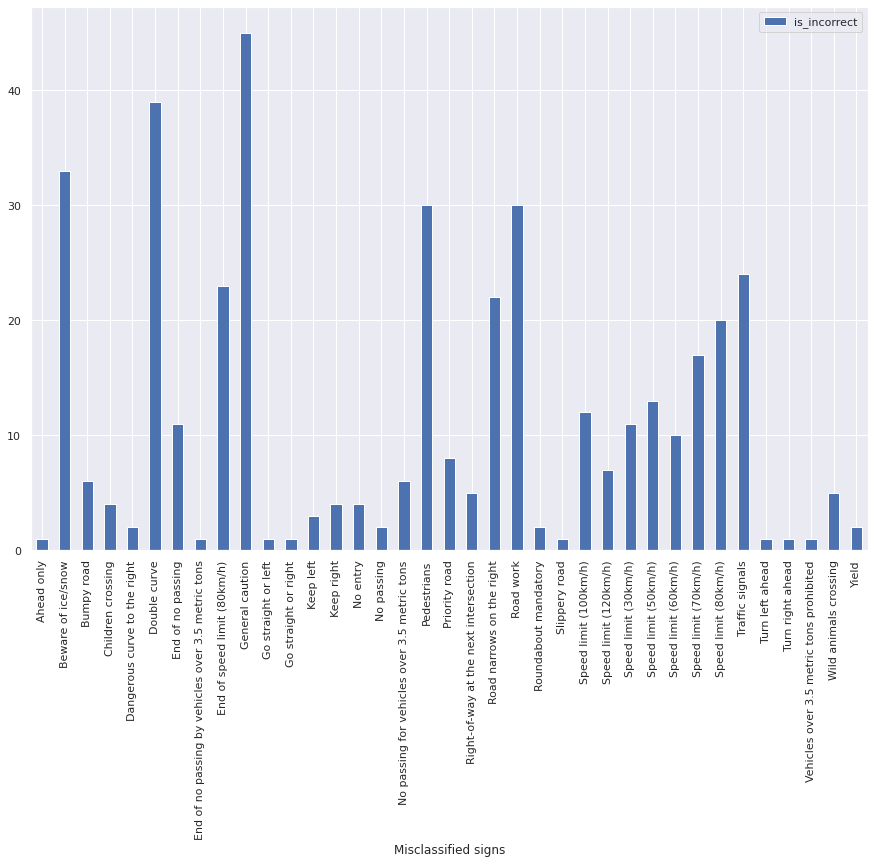

In [ ]:
#plotting results to see what signes were missmatched most commonly
misclassified_grouped_sum.plot(kind = 'bar', figsize=(15, 10), xlabel = 'Misclassified signs')

#12. Model - RGB

In [11]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                 input_shape=X_test.shape[1:],
                 activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [12]:
model.compile(optimizer=RMSprop(lr=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
X_valid_rgb.shape

(4410, 3, 32, 32)

In [13]:
history = model.fit(X_train_rgb, y_train_rgb,
                   batch_size=32,
                   epochs=20,
                   validation_data=(X_valid_rgb, y_valid_rgb),
                   shuffle=True)

Epoch 1/20
2719/2719 [==============================] - 61s 6ms/step - loss: 3.4357 - accuracy: 0.0936 - val_loss: 2.1264 - val_accuracy: 0.3558
Epoch 2/20
2719/2719 [==============================] - 16s 6ms/step - loss: 1.8248 - accuracy: 0.4553 - val_loss: 1.2943 - val_accuracy: 0.6100
Epoch 3/20
2719/2719 [==============================] - 16s 6ms/step - loss: 1.1280 - accuracy: 0.6636 - val_loss: 0.8880 - val_accuracy: 0.7288
Epoch 4/20
2719/2719 [==============================] - 15s 6ms/step - loss: 0.7704 - accuracy: 0.7765 - val_loss: 0.6897 - val_accuracy: 0.7787
Epoch 5/20
2719/2719 [==============================] - 15s 6ms/step - loss: 0.5656 - accuracy: 0.8400 - val_loss: 0.5331 - val_accuracy: 0.8370
Epoch 6/20
2719/2719 [==============================] - 15s 6ms/step - loss: 0.4287 - accuracy: 0.8792 - val_loss: 0.4235 - val_accuracy: 0.8580
Epoch 7/20
2719/2719 [==============================] - 16s 6ms/step - loss: 0.3387 - accuracy: 0.9046 - val_loss: 0.3642 - val_ac

In [15]:
score = model.evaluate(X_test_rgb, y_test_rgb)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

395/395 [==============================] - 1s 3ms/step - loss: 0.2244 - accuracy: 0.9476
Test loss: 0.2244279831647873
Test accuracy: 0.9475851058959961


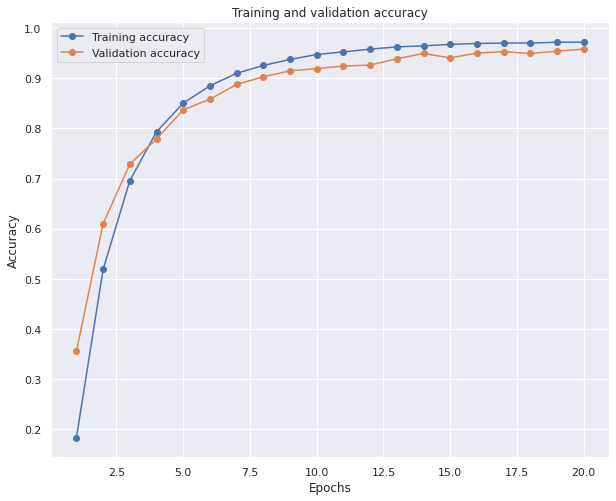

In [16]:
make_accuracy_plot(history)

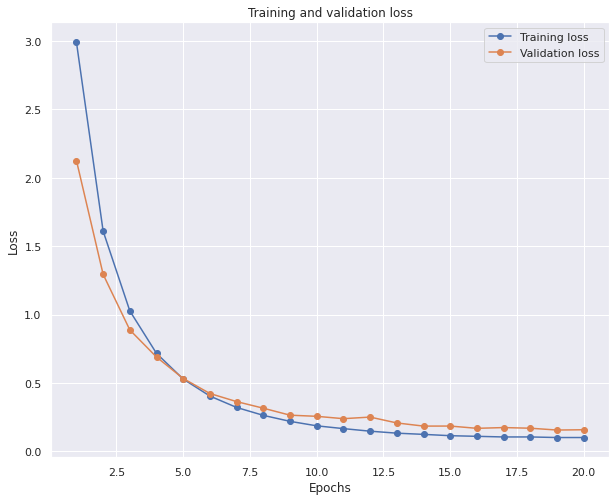

In [17]:
make_loss_plot(history)

# 13. Model - Gray

In [21]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                 input_shape=X_test_gray.shape[1:],
                 activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

In [23]:
model.compile(optimizer=RMSprop(lr=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [24]:
history = model.fit(X_train_gray, y_train_gray,
                   batch_size=32,
                   epochs=20,
                   validation_data=(X_valid_gray, y_valid_gray),
                   shuffle=True)

Epoch 1/20
2719/2719 [==============================] - 15s 5ms/step - loss: 3.1577 - accuracy: 0.1770 - val_loss: 0.9522 - val_accuracy: 0.7227
Epoch 2/20
2719/2719 [==============================] - 14s 5ms/step - loss: 1.0344 - accuracy: 0.7078 - val_loss: 0.4738 - val_accuracy: 0.8626
Epoch 3/20
2719/2719 [==============================] - 15s 5ms/step - loss: 0.6059 - accuracy: 0.8289 - val_loss: 0.3699 - val_accuracy: 0.9048
Epoch 4/20
2719/2719 [==============================] - 14s 5ms/step - loss: 0.4292 - accuracy: 0.8799 - val_loss: 0.2955 - val_accuracy: 0.9243
Epoch 5/20
2719/2719 [==============================] - 14s 5ms/step - loss: 0.3366 - accuracy: 0.9069 - val_loss: 0.2927 - val_accuracy: 0.9231
Epoch 6/20
2719/2719 [==============================] - 14s 5ms/step - loss: 0.2710 - accuracy: 0.9263 - val_loss: 0.2463 - val_accuracy: 0.9420
Epoch 7/20
2719/2719 [==============================] - 14s 5ms/step - loss: 0.2324 - accuracy: 0.9374 - val_loss: 0.2319 - val_ac

In [26]:
score = model.evaluate(X_test_gray, y_test_gray)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

395/395 [==============================] - 1s 3ms/step - loss: 0.1889 - accuracy: 0.9528
Test loss: 0.18887008726596832
Test accuracy: 0.9528107643127441


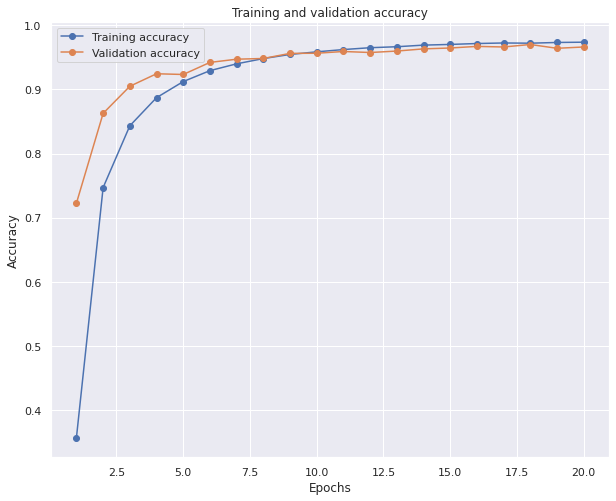

In [27]:
make_accuracy_plot(history)

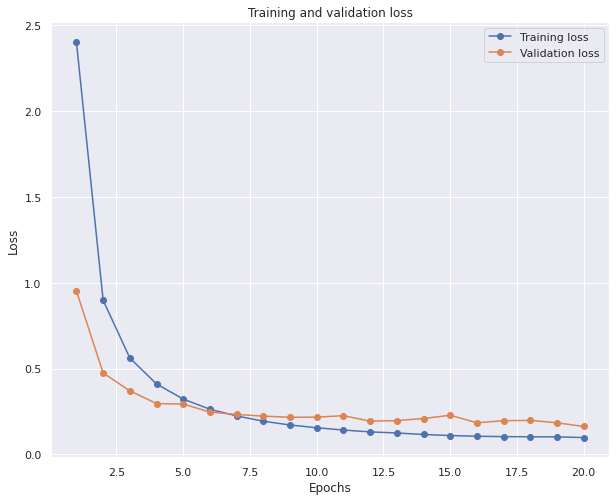

In [28]:
make_loss_plot(history)